# Validation: Testing effect of leaving out CMs 
This notebook:

* loads a library defined model. 
* loads the data according to the data preprocessor class.
* tests the effect of leaving out CMs on overall CM effectiveness

In [135]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [169]:
### Initial imports
import logging
import numpy as np
import pandas as pd
import pymc3 as pm
import theano.tensor as T
import matplotlib.pyplot as plt
import types
import seaborn as sns
import scipy

logging.basicConfig(level=logging.INFO)
log = logging.getLogger(__name__)

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

from epimodel.pymc3_models.utils import geom_convolution
from epimodel.pymc3_models import cm_effect
from epimodel.pymc3_models.cm_effect.datapreprocessor import DataPreprocessor


%matplotlib inline

In [137]:
regions = ['AT', 'BA', 'BE', 'BG', 'CH', 'CZ', 'DE', 'DK', 'EE', 'ES', 'FI', 'FR', 'GB', 'GR', 'HR', 'HU', 'IE', 'IS', 'IT', 'LT', 'NL', 'PL', 'RO', 'RS', 'RU', 'SE', 'SI', 'SK']
# Same, outside Europe
regions += ['AD', 'CN-HK', 'EG', 'IL', 'JP', 'KR', 'MX', 'SG']

['Masks over 60', 'Asymptomatic contact isolation', 'Gatherings limited to 10', 'Gatherings limited to 100', 'Gatherings limited to 1000', 'Business suspended - some', 'Business suspended - many', 'Schools and universities closed', 'General curfew - permissive', 'General curfew - strict', 'Healthcare specialisation over 0.2']


INFO:epimodel.regions:Name index has 7 potential conflicts: ['american samoa', 'georgia', 'guam', 'northern mariana islands', 'puerto rico', 'united states minor outlying islands', 'virgin islands (u.s.)']
INFO:epimodel.pymc3_models.cm_effect.datapreprocessor:
Countermeasures                               min   ... mean  ... max   ... unique
 1 Masks over 60                              0.000 ... 0.016 ... 1.000 ... [0. 1.]
 2 Asymptomatic contact isolation             0.000 ... 0.120 ... 1.000 ... [0. 1.]
 3 Gatherings limited to 10                   0.000 ... 0.153 ... 1.000 ... [0. 1.]
 4 Gatherings limited to 100                  0.000 ... 0.248 ... 1.000 ... [0. 1.]
 5 Gatherings limited to 1000                 0.000 ... 0.285 ... 1.000 ... [0. 1.]
 6 Business suspended - some                  0.000 ... 0.283 ... 1.000 ... [0. 1.]
 7 Business suspended - many                  0.000 ... 0.206 ... 1.000 ... [0. 1.]
 8 Schools and universities closed            0.000 ... 0.359 ... 1.

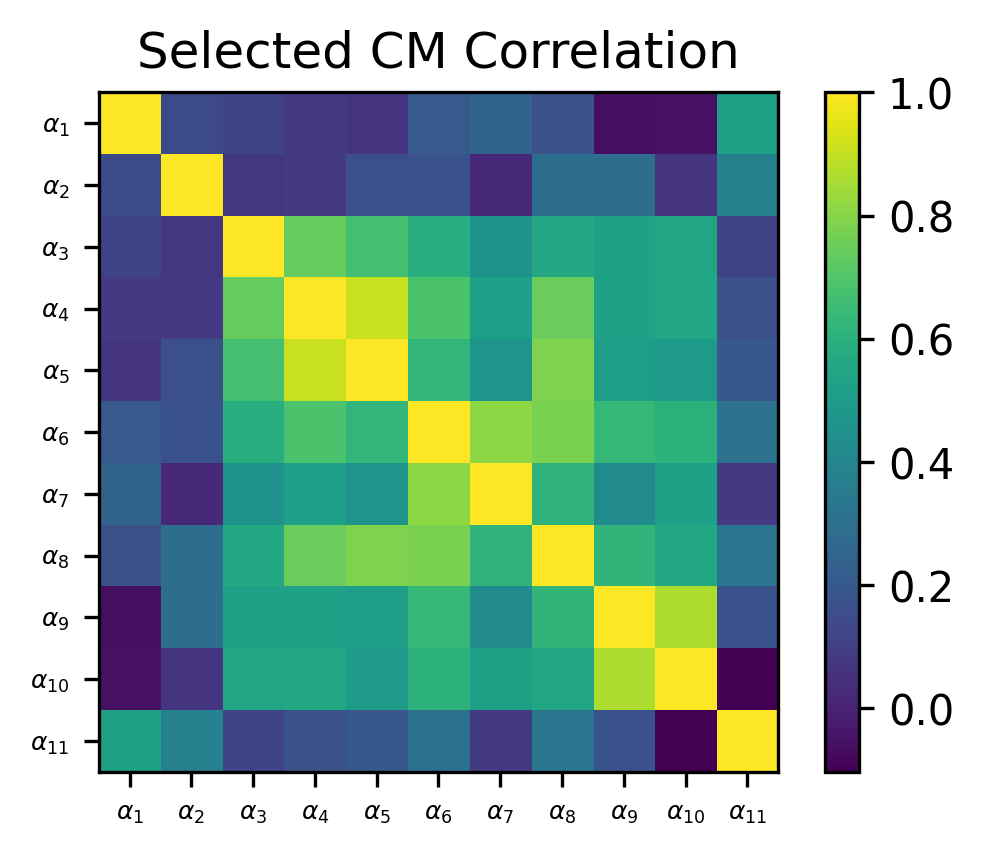

INFO:epimodel.pymc3_models.cm_effect.datapreprocessor:Data Preprocessing Complete using:

{
    "start_date": "2020-2-10",
    "end_date": "2020-04-05",
    "min_final_num_active_cases": 100,
    "min_num_active_mask": 10,
    "min_num_confirmed_mask": 10
}
Selected 35 Regions: f['AD', 'AT', 'BA', 'BE', 'BG', 'CH', 'CZ', 'DE', 'DK', 'EE', 'EG', 'ES', 'FI', 'FR', 'GB', 'GR', 'HR', 'HU', 'IE', 'IL', 'IS', 'IT', 'JP', 'KR', 'LT', 'MX', 'NL', 'PL', 'RO', 'RS', 'RU', 'SE', 'SG', 'SI', 'SK']
/Users/annie/anaconda/envs/py38/lib/python3.8/site-packages/pymc3/model.py:1430: ImputationWarning: Data in Observed_log contains missing values and will be automatically imputed from the sampling distribution.
  warnings.warn(impute_message, ImputationWarning)
INFO:__main__:Checking model test point
INFO:__main__:
CM_Alpha_log__              -15.61
RegionGrowthRate_log          9.98
RegionNoiseScale             72.69
Growth                     2711.95
InitialSize_log            -112.75
Observed_log_miss

CM_Alpha_log__              -15.61
RegionGrowthRate_log          9.98
RegionNoiseScale             72.69
Growth                     2711.95
InitialSize_log            -112.75
Observed_log_missing          0.00
Observed_log           -2977266.32
Name: Log-probability of test_point, dtype: float64


Multiprocess sampling (2 chains in 2 jobs)
INFO:pymc3:Multiprocess sampling (2 chains in 2 jobs)
NUTS: [Observed_log_missing, InitialSize_log, Growth, RegionNoiseScale, RegionGrowthRate_log, CM_Alpha]
INFO:pymc3:NUTS: [Observed_log_missing, InitialSize_log, Growth, RegionNoiseScale, RegionGrowthRate_log, CM_Alpha]
Sampling 2 chains, 0 divergences: 100%|██████████| 5000/5000 [07:52<00:00, 10.58draws/s]
The estimated number of effective samples is smaller than 200 for some parameters.
ERROR:pymc3:The estimated number of effective samples is smaller than 200 for some parameters.
INFO:epimodel.regions:Name index has 7 potential conflicts: ['american samoa', 'georgia', 'guam', 'northern mariana islands', 'puerto rico', 'united states minor outlying islands', 'virgin islands (u.s.)']


['Asymptomatic contact isolation', 'Gatherings limited to 10', 'Gatherings limited to 100', 'Gatherings limited to 1000', 'Business suspended - some', 'Business suspended - many', 'Schools and universities closed', 'General curfew - permissive', 'General curfew - strict', 'Healthcare specialisation over 0.2']


INFO:epimodel.pymc3_models.cm_effect.datapreprocessor:
Countermeasures                               min   ... mean  ... max   ... unique
 1 Asymptomatic contact isolation             0.000 ... 0.120 ... 1.000 ... [0. 1.]
 2 Gatherings limited to 10                   0.000 ... 0.153 ... 1.000 ... [0. 1.]
 3 Gatherings limited to 100                  0.000 ... 0.248 ... 1.000 ... [0. 1.]
 4 Gatherings limited to 1000                 0.000 ... 0.285 ... 1.000 ... [0. 1.]
 5 Business suspended - some                  0.000 ... 0.283 ... 1.000 ... [0. 1.]
 6 Business suspended - many                  0.000 ... 0.206 ... 1.000 ... [0. 1.]
 7 Schools and universities closed            0.000 ... 0.359 ... 1.000 ... [0. 1.]
 8 General curfew - permissive                0.000 ... 0.190 ... 1.000 ... [0. 1.]
 9 General curfew - strict                    0.000 ... 0.149 ... 1.000 ... [0. 1.]
10 Healthcare specialisation over 0.2         0.000 ... 0.057 ... 1.000 ... [0. 1.]


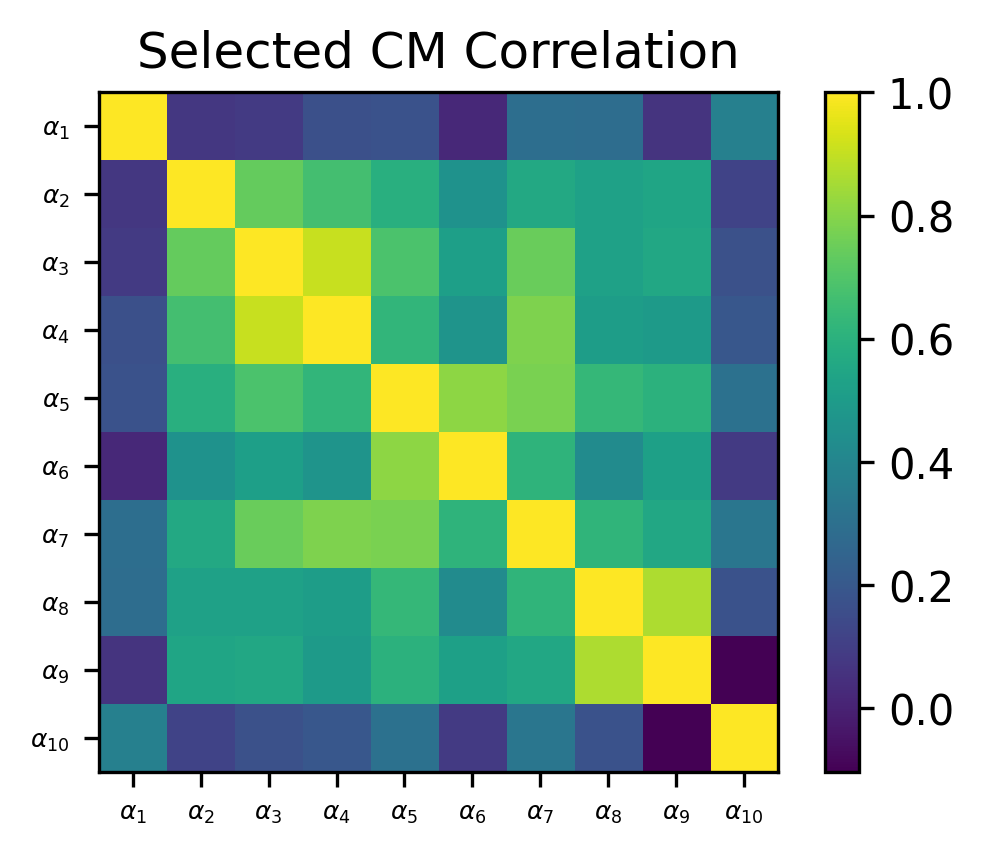

INFO:epimodel.pymc3_models.cm_effect.datapreprocessor:Data Preprocessing Complete using:

{
    "start_date": "2020-2-10",
    "end_date": "2020-04-05",
    "min_final_num_active_cases": 100,
    "min_num_active_mask": 10,
    "min_num_confirmed_mask": 10
}
Selected 35 Regions: f['AD', 'AT', 'BA', 'BE', 'BG', 'CH', 'CZ', 'DE', 'DK', 'EE', 'EG', 'ES', 'FI', 'FR', 'GB', 'GR', 'HR', 'HU', 'IE', 'IL', 'IS', 'IT', 'JP', 'KR', 'LT', 'MX', 'NL', 'PL', 'RO', 'RS', 'RU', 'SE', 'SG', 'SI', 'SK']
/Users/annie/anaconda/envs/py38/lib/python3.8/site-packages/pymc3/model.py:1430: ImputationWarning: Data in Observed_log contains missing values and will be automatically imputed from the sampling distribution.
  warnings.warn(impute_message, ImputationWarning)
INFO:__main__:Checking model test point
INFO:__main__:
CM_Alpha_log__              -14.19
RegionGrowthRate_log          9.98
RegionNoiseScale             72.69
Growth                     2711.95
InitialSize_log            -112.75
Observed_log_miss

CM_Alpha_log__              -14.19
RegionGrowthRate_log          9.98
RegionNoiseScale             72.69
Growth                     2711.95
InitialSize_log            -112.75
Observed_log_missing          0.00
Observed_log           -2967419.91
Name: Log-probability of test_point, dtype: float64


Multiprocess sampling (2 chains in 2 jobs)
INFO:pymc3:Multiprocess sampling (2 chains in 2 jobs)
NUTS: [Observed_log_missing, InitialSize_log, Growth, RegionNoiseScale, RegionGrowthRate_log, CM_Alpha]
INFO:pymc3:NUTS: [Observed_log_missing, InitialSize_log, Growth, RegionNoiseScale, RegionGrowthRate_log, CM_Alpha]
Sampling 2 chains, 1 divergences: 100%|██████████| 5000/5000 [07:50<00:00, 10.63draws/s]
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
ERROR:pymc3:There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
The estimated number of effective samples is smaller than 200 for some parameters.
ERROR:pymc3:The estimated number of effective samples is smaller than 200 for some parameters.
INFO:epimodel.regions:Name index has 7 potential conflicts: ['american samoa', 'georgia', 'guam', 'northern mariana islands', 'puerto rico', 'united states minor outlying islands', 'virgin islands (u.s.)']


['Masks over 60', 'Gatherings limited to 10', 'Gatherings limited to 100', 'Gatherings limited to 1000', 'Business suspended - some', 'Business suspended - many', 'Schools and universities closed', 'General curfew - permissive', 'General curfew - strict', 'Healthcare specialisation over 0.2']


INFO:epimodel.pymc3_models.cm_effect.datapreprocessor:
Countermeasures                               min   ... mean  ... max   ... unique
 1 Masks over 60                              0.000 ... 0.016 ... 1.000 ... [0. 1.]
 2 Gatherings limited to 10                   0.000 ... 0.153 ... 1.000 ... [0. 1.]
 3 Gatherings limited to 100                  0.000 ... 0.248 ... 1.000 ... [0. 1.]
 4 Gatherings limited to 1000                 0.000 ... 0.285 ... 1.000 ... [0. 1.]
 5 Business suspended - some                  0.000 ... 0.283 ... 1.000 ... [0. 1.]
 6 Business suspended - many                  0.000 ... 0.206 ... 1.000 ... [0. 1.]
 7 Schools and universities closed            0.000 ... 0.359 ... 1.000 ... [0. 1.]
 8 General curfew - permissive                0.000 ... 0.190 ... 1.000 ... [0. 1.]
 9 General curfew - strict                    0.000 ... 0.149 ... 1.000 ... [0. 1.]
10 Healthcare specialisation over 0.2         0.000 ... 0.057 ... 1.000 ... [0. 1.]


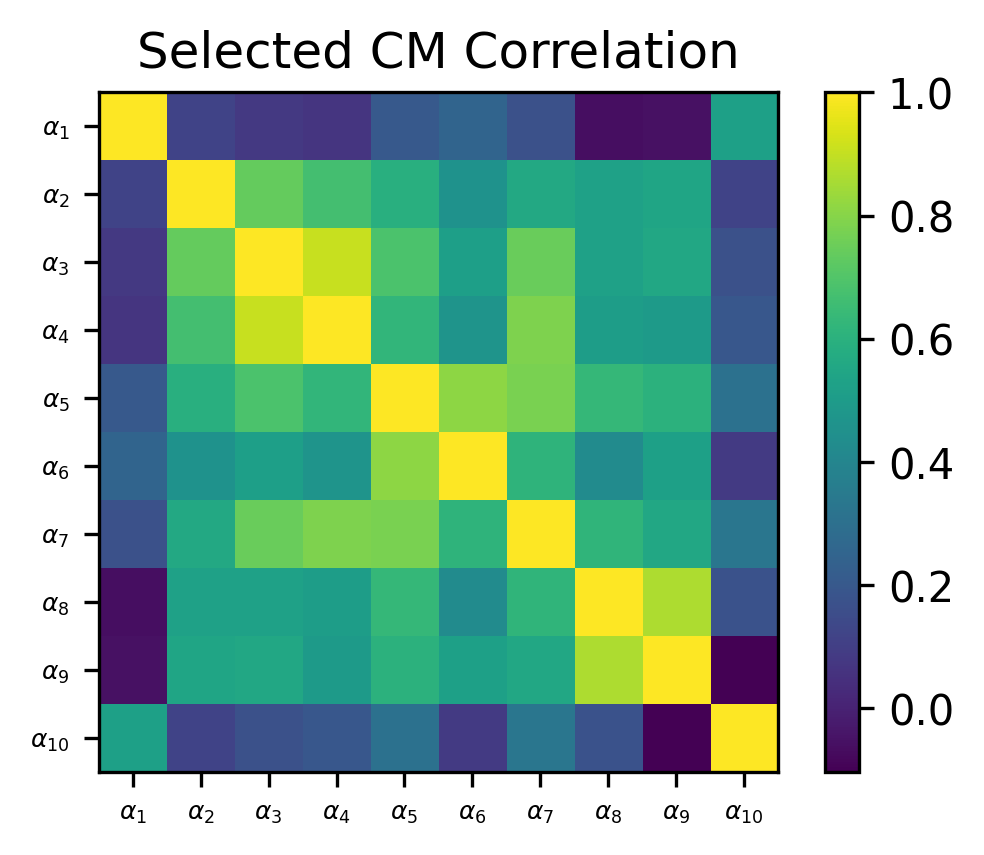

INFO:epimodel.pymc3_models.cm_effect.datapreprocessor:Data Preprocessing Complete using:

{
    "start_date": "2020-2-10",
    "end_date": "2020-04-05",
    "min_final_num_active_cases": 100,
    "min_num_active_mask": 10,
    "min_num_confirmed_mask": 10
}
Selected 35 Regions: f['AD', 'AT', 'BA', 'BE', 'BG', 'CH', 'CZ', 'DE', 'DK', 'EE', 'EG', 'ES', 'FI', 'FR', 'GB', 'GR', 'HR', 'HU', 'IE', 'IL', 'IS', 'IT', 'JP', 'KR', 'LT', 'MX', 'NL', 'PL', 'RO', 'RS', 'RU', 'SE', 'SG', 'SI', 'SK']
/Users/annie/anaconda/envs/py38/lib/python3.8/site-packages/pymc3/model.py:1430: ImputationWarning: Data in Observed_log contains missing values and will be automatically imputed from the sampling distribution.
  warnings.warn(impute_message, ImputationWarning)
INFO:__main__:Checking model test point
INFO:__main__:
CM_Alpha_log__              -14.19
RegionGrowthRate_log          9.98
RegionNoiseScale             72.69
Growth                     2711.95
InitialSize_log            -112.75
Observed_log_miss

CM_Alpha_log__              -14.19
RegionGrowthRate_log          9.98
RegionNoiseScale             72.69
Growth                     2711.95
InitialSize_log            -112.75
Observed_log_missing          0.00
Observed_log           -2421396.89
Name: Log-probability of test_point, dtype: float64


Multiprocess sampling (2 chains in 2 jobs)
INFO:pymc3:Multiprocess sampling (2 chains in 2 jobs)
NUTS: [Observed_log_missing, InitialSize_log, Growth, RegionNoiseScale, RegionGrowthRate_log, CM_Alpha]
INFO:pymc3:NUTS: [Observed_log_missing, InitialSize_log, Growth, RegionNoiseScale, RegionGrowthRate_log, CM_Alpha]
Sampling 2 chains, 0 divergences: 100%|██████████| 5000/5000 [07:13<00:00, 11.54draws/s]
The number of effective samples is smaller than 10% for some parameters.
INFO:epimodel.regions:Name index has 7 potential conflicts: ['american samoa', 'georgia', 'guam', 'northern mariana islands', 'puerto rico', 'united states minor outlying islands', 'virgin islands (u.s.)']


['Masks over 60', 'Asymptomatic contact isolation', 'Gatherings limited to 100', 'Gatherings limited to 1000', 'Business suspended - some', 'Business suspended - many', 'Schools and universities closed', 'General curfew - permissive', 'General curfew - strict', 'Healthcare specialisation over 0.2']


INFO:epimodel.pymc3_models.cm_effect.datapreprocessor:
Countermeasures                               min   ... mean  ... max   ... unique
 1 Masks over 60                              0.000 ... 0.016 ... 1.000 ... [0. 1.]
 2 Asymptomatic contact isolation             0.000 ... 0.120 ... 1.000 ... [0. 1.]
 3 Gatherings limited to 100                  0.000 ... 0.248 ... 1.000 ... [0. 1.]
 4 Gatherings limited to 1000                 0.000 ... 0.285 ... 1.000 ... [0. 1.]
 5 Business suspended - some                  0.000 ... 0.283 ... 1.000 ... [0. 1.]
 6 Business suspended - many                  0.000 ... 0.206 ... 1.000 ... [0. 1.]
 7 Schools and universities closed            0.000 ... 0.359 ... 1.000 ... [0. 1.]
 8 General curfew - permissive                0.000 ... 0.190 ... 1.000 ... [0. 1.]
 9 General curfew - strict                    0.000 ... 0.149 ... 1.000 ... [0. 1.]
10 Healthcare specialisation over 0.2         0.000 ... 0.057 ... 1.000 ... [0. 1.]


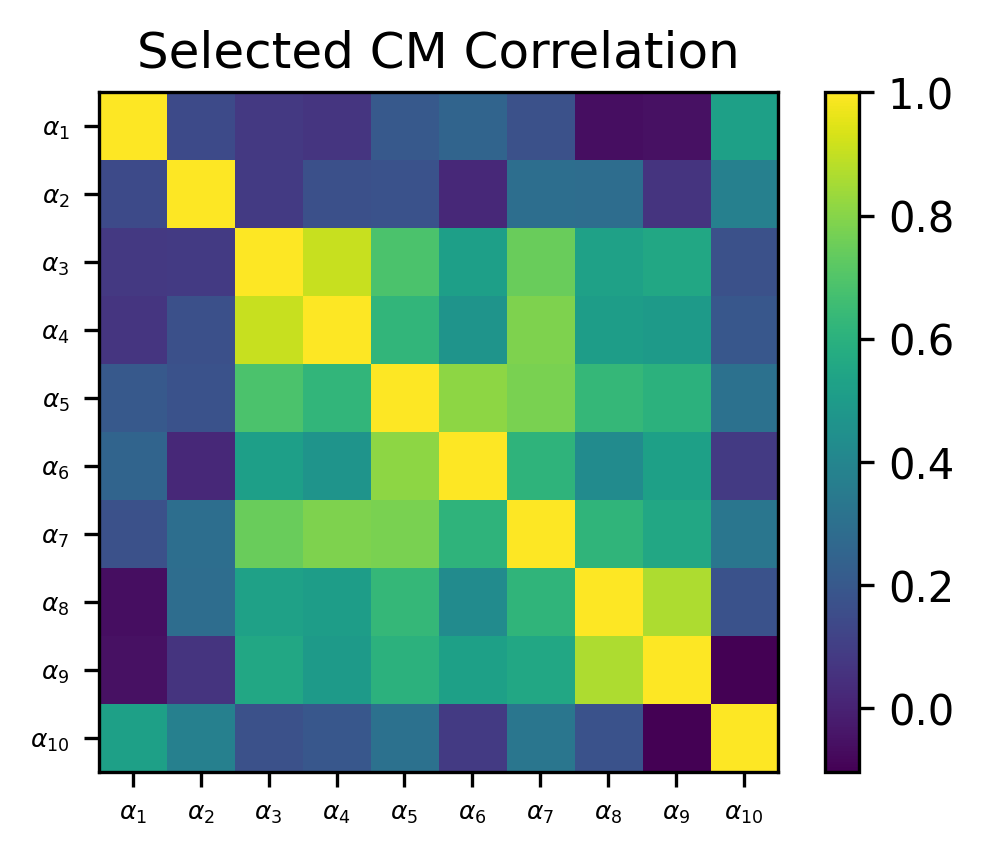

INFO:epimodel.pymc3_models.cm_effect.datapreprocessor:Data Preprocessing Complete using:

{
    "start_date": "2020-2-10",
    "end_date": "2020-04-05",
    "min_final_num_active_cases": 100,
    "min_num_active_mask": 10,
    "min_num_confirmed_mask": 10
}
Selected 35 Regions: f['AD', 'AT', 'BA', 'BE', 'BG', 'CH', 'CZ', 'DE', 'DK', 'EE', 'EG', 'ES', 'FI', 'FR', 'GB', 'GR', 'HR', 'HU', 'IE', 'IL', 'IS', 'IT', 'JP', 'KR', 'LT', 'MX', 'NL', 'PL', 'RO', 'RS', 'RU', 'SE', 'SG', 'SI', 'SK']
/Users/annie/anaconda/envs/py38/lib/python3.8/site-packages/pymc3/model.py:1430: ImputationWarning: Data in Observed_log contains missing values and will be automatically imputed from the sampling distribution.
  warnings.warn(impute_message, ImputationWarning)
INFO:__main__:Checking model test point
INFO:__main__:
CM_Alpha_log__              -14.19
RegionGrowthRate_log          9.98
RegionNoiseScale             72.69
Growth                     2711.95
InitialSize_log            -112.75
Observed_log_miss

CM_Alpha_log__              -14.19
RegionGrowthRate_log          9.98
RegionNoiseScale             72.69
Growth                     2711.95
InitialSize_log            -112.75
Observed_log_missing          0.00
Observed_log           -2734614.11
Name: Log-probability of test_point, dtype: float64


Multiprocess sampling (2 chains in 2 jobs)
INFO:pymc3:Multiprocess sampling (2 chains in 2 jobs)
NUTS: [Observed_log_missing, InitialSize_log, Growth, RegionNoiseScale, RegionGrowthRate_log, CM_Alpha]
INFO:pymc3:NUTS: [Observed_log_missing, InitialSize_log, Growth, RegionNoiseScale, RegionGrowthRate_log, CM_Alpha]
Sampling 2 chains, 7 divergences: 100%|██████████| 5000/5000 [07:07<00:00, 11.69draws/s]
There were 7 divergences after tuning. Increase `target_accept` or reparameterize.
ERROR:pymc3:There were 7 divergences after tuning. Increase `target_accept` or reparameterize.
The estimated number of effective samples is smaller than 200 for some parameters.
ERROR:pymc3:The estimated number of effective samples is smaller than 200 for some parameters.
INFO:epimodel.regions:Name index has 7 potential conflicts: ['american samoa', 'georgia', 'guam', 'northern mariana islands', 'puerto rico', 'united states minor outlying islands', 'virgin islands (u.s.)']


['Masks over 60', 'Asymptomatic contact isolation', 'Gatherings limited to 10', 'Gatherings limited to 1000', 'Business suspended - some', 'Business suspended - many', 'Schools and universities closed', 'General curfew - permissive', 'General curfew - strict', 'Healthcare specialisation over 0.2']


INFO:epimodel.pymc3_models.cm_effect.datapreprocessor:
Countermeasures                               min   ... mean  ... max   ... unique
 1 Masks over 60                              0.000 ... 0.016 ... 1.000 ... [0. 1.]
 2 Asymptomatic contact isolation             0.000 ... 0.120 ... 1.000 ... [0. 1.]
 3 Gatherings limited to 10                   0.000 ... 0.153 ... 1.000 ... [0. 1.]
 4 Gatherings limited to 1000                 0.000 ... 0.285 ... 1.000 ... [0. 1.]
 5 Business suspended - some                  0.000 ... 0.283 ... 1.000 ... [0. 1.]
 6 Business suspended - many                  0.000 ... 0.206 ... 1.000 ... [0. 1.]
 7 Schools and universities closed            0.000 ... 0.359 ... 1.000 ... [0. 1.]
 8 General curfew - permissive                0.000 ... 0.190 ... 1.000 ... [0. 1.]
 9 General curfew - strict                    0.000 ... 0.149 ... 1.000 ... [0. 1.]
10 Healthcare specialisation over 0.2         0.000 ... 0.057 ... 1.000 ... [0. 1.]


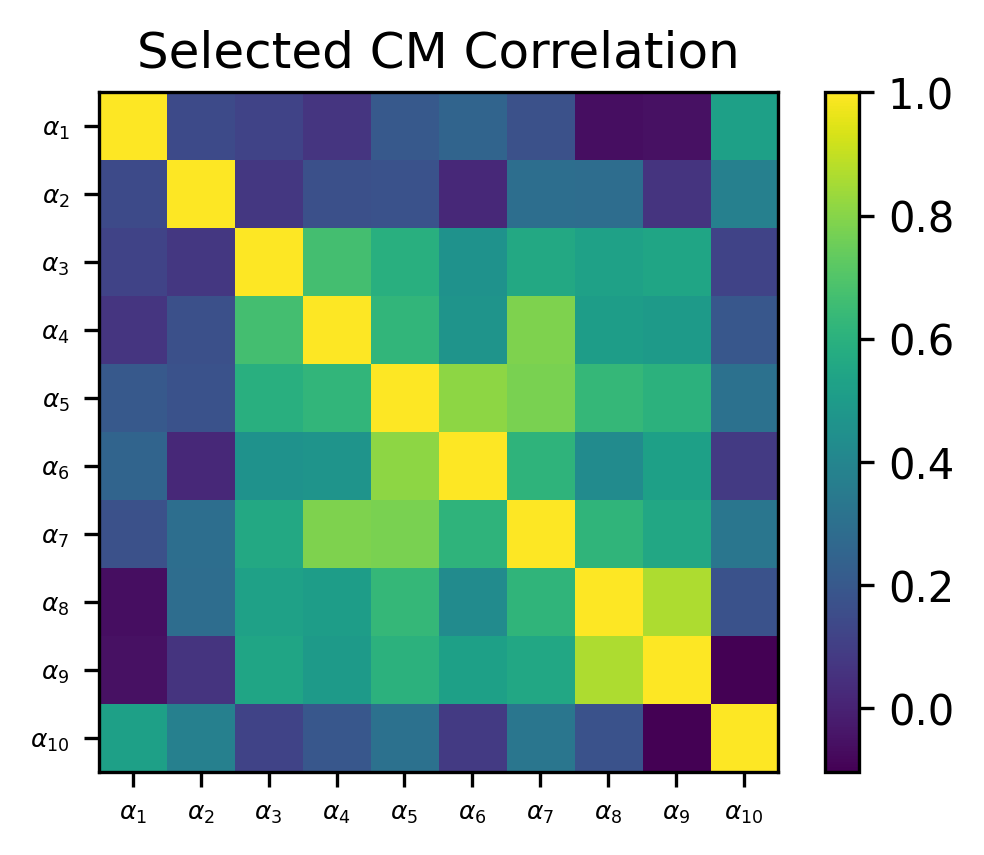

INFO:epimodel.pymc3_models.cm_effect.datapreprocessor:Data Preprocessing Complete using:

{
    "start_date": "2020-2-10",
    "end_date": "2020-04-05",
    "min_final_num_active_cases": 100,
    "min_num_active_mask": 10,
    "min_num_confirmed_mask": 10
}
Selected 35 Regions: f['AD', 'AT', 'BA', 'BE', 'BG', 'CH', 'CZ', 'DE', 'DK', 'EE', 'EG', 'ES', 'FI', 'FR', 'GB', 'GR', 'HR', 'HU', 'IE', 'IL', 'IS', 'IT', 'JP', 'KR', 'LT', 'MX', 'NL', 'PL', 'RO', 'RS', 'RU', 'SE', 'SG', 'SI', 'SK']
/Users/annie/anaconda/envs/py38/lib/python3.8/site-packages/pymc3/model.py:1430: ImputationWarning: Data in Observed_log contains missing values and will be automatically imputed from the sampling distribution.
  warnings.warn(impute_message, ImputationWarning)
INFO:__main__:Checking model test point
INFO:__main__:
CM_Alpha_log__              -14.19
RegionGrowthRate_log          9.98
RegionNoiseScale             72.69
Growth                     2711.95
InitialSize_log            -112.75
Observed_log_miss

CM_Alpha_log__              -14.19
RegionGrowthRate_log          9.98
RegionNoiseScale             72.69
Growth                     2711.95
InitialSize_log            -112.75
Observed_log_missing          0.00
Observed_log           -2423947.55
Name: Log-probability of test_point, dtype: float64


Multiprocess sampling (2 chains in 2 jobs)
INFO:pymc3:Multiprocess sampling (2 chains in 2 jobs)
NUTS: [Observed_log_missing, InitialSize_log, Growth, RegionNoiseScale, RegionGrowthRate_log, CM_Alpha]
INFO:pymc3:NUTS: [Observed_log_missing, InitialSize_log, Growth, RegionNoiseScale, RegionGrowthRate_log, CM_Alpha]
Sampling 2 chains, 2 divergences: 100%|██████████| 5000/5000 [07:09<00:00, 11.64draws/s]
There were 2 divergences after tuning. Increase `target_accept` or reparameterize.
ERROR:pymc3:There were 2 divergences after tuning. Increase `target_accept` or reparameterize.
The estimated number of effective samples is smaller than 200 for some parameters.
ERROR:pymc3:The estimated number of effective samples is smaller than 200 for some parameters.
INFO:epimodel.regions:Name index has 7 potential conflicts: ['american samoa', 'georgia', 'guam', 'northern mariana islands', 'puerto rico', 'united states minor outlying islands', 'virgin islands (u.s.)']


['Masks over 60', 'Asymptomatic contact isolation', 'Gatherings limited to 10', 'Gatherings limited to 100', 'Business suspended - some', 'Business suspended - many', 'Schools and universities closed', 'General curfew - permissive', 'General curfew - strict', 'Healthcare specialisation over 0.2']


INFO:epimodel.pymc3_models.cm_effect.datapreprocessor:
Countermeasures                               min   ... mean  ... max   ... unique
 1 Masks over 60                              0.000 ... 0.016 ... 1.000 ... [0. 1.]
 2 Asymptomatic contact isolation             0.000 ... 0.120 ... 1.000 ... [0. 1.]
 3 Gatherings limited to 10                   0.000 ... 0.153 ... 1.000 ... [0. 1.]
 4 Gatherings limited to 100                  0.000 ... 0.248 ... 1.000 ... [0. 1.]
 5 Business suspended - some                  0.000 ... 0.283 ... 1.000 ... [0. 1.]
 6 Business suspended - many                  0.000 ... 0.206 ... 1.000 ... [0. 1.]
 7 Schools and universities closed            0.000 ... 0.359 ... 1.000 ... [0. 1.]
 8 General curfew - permissive                0.000 ... 0.190 ... 1.000 ... [0. 1.]
 9 General curfew - strict                    0.000 ... 0.149 ... 1.000 ... [0. 1.]
10 Healthcare specialisation over 0.2         0.000 ... 0.057 ... 1.000 ... [0. 1.]


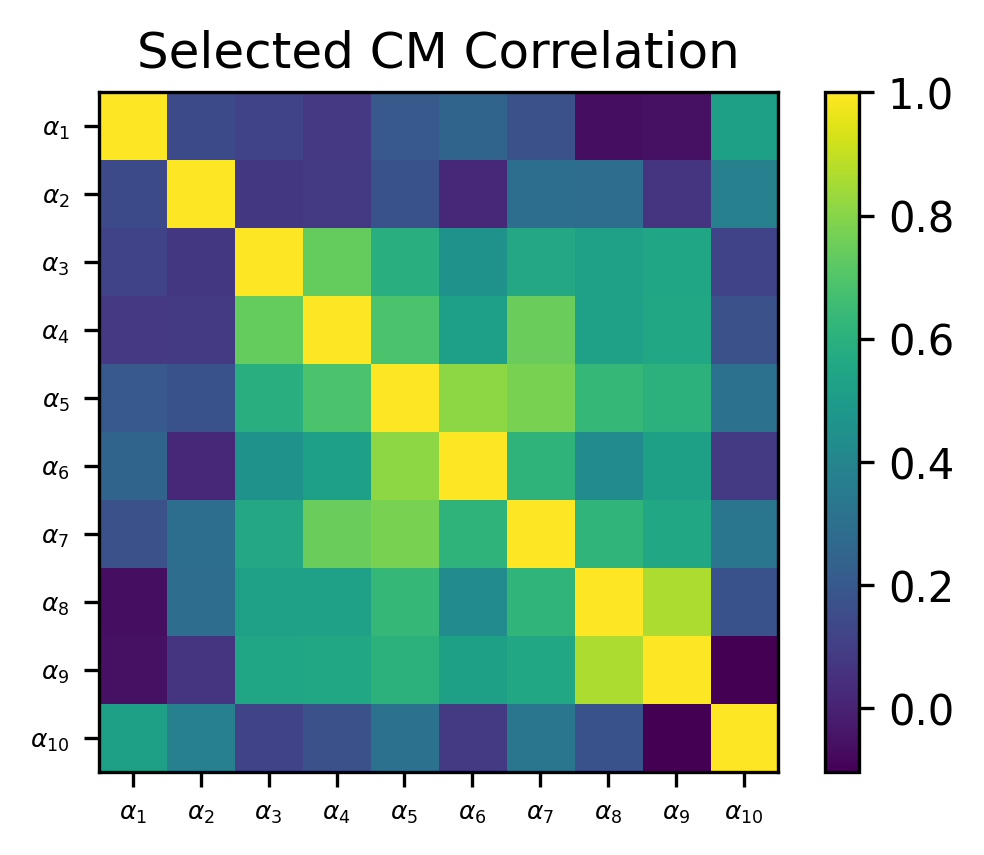

INFO:epimodel.pymc3_models.cm_effect.datapreprocessor:Data Preprocessing Complete using:

{
    "start_date": "2020-2-10",
    "end_date": "2020-04-05",
    "min_final_num_active_cases": 100,
    "min_num_active_mask": 10,
    "min_num_confirmed_mask": 10
}
Selected 35 Regions: f['AD', 'AT', 'BA', 'BE', 'BG', 'CH', 'CZ', 'DE', 'DK', 'EE', 'EG', 'ES', 'FI', 'FR', 'GB', 'GR', 'HR', 'HU', 'IE', 'IL', 'IS', 'IT', 'JP', 'KR', 'LT', 'MX', 'NL', 'PL', 'RO', 'RS', 'RU', 'SE', 'SG', 'SI', 'SK']
/Users/annie/anaconda/envs/py38/lib/python3.8/site-packages/pymc3/model.py:1430: ImputationWarning: Data in Observed_log contains missing values and will be automatically imputed from the sampling distribution.
  warnings.warn(impute_message, ImputationWarning)
INFO:__main__:Checking model test point
INFO:__main__:
CM_Alpha_log__              -14.19
RegionGrowthRate_log          9.98
RegionNoiseScale             72.69
Growth                     2711.95
InitialSize_log            -112.75
Observed_log_miss

CM_Alpha_log__              -14.19
RegionGrowthRate_log          9.98
RegionNoiseScale             72.69
Growth                     2711.95
InitialSize_log            -112.75
Observed_log_missing          0.00
Observed_log           -2141694.15
Name: Log-probability of test_point, dtype: float64


Multiprocess sampling (2 chains in 2 jobs)
INFO:pymc3:Multiprocess sampling (2 chains in 2 jobs)
NUTS: [Observed_log_missing, InitialSize_log, Growth, RegionNoiseScale, RegionGrowthRate_log, CM_Alpha]
INFO:pymc3:NUTS: [Observed_log_missing, InitialSize_log, Growth, RegionNoiseScale, RegionGrowthRate_log, CM_Alpha]
Sampling 2 chains, 6 divergences: 100%|██████████| 5000/5000 [07:02<00:00, 11.83draws/s]
There were 6 divergences after tuning. Increase `target_accept` or reparameterize.
ERROR:pymc3:There were 6 divergences after tuning. Increase `target_accept` or reparameterize.
The number of effective samples is smaller than 10% for some parameters.
INFO:epimodel.regions:Name index has 7 potential conflicts: ['american samoa', 'georgia', 'guam', 'northern mariana islands', 'puerto rico', 'united states minor outlying islands', 'virgin islands (u.s.)']


['Masks over 60', 'Asymptomatic contact isolation', 'Gatherings limited to 10', 'Gatherings limited to 100', 'Gatherings limited to 1000', 'Business suspended - many', 'Schools and universities closed', 'General curfew - permissive', 'General curfew - strict', 'Healthcare specialisation over 0.2']


INFO:epimodel.pymc3_models.cm_effect.datapreprocessor:
Countermeasures                               min   ... mean  ... max   ... unique
 1 Masks over 60                              0.000 ... 0.016 ... 1.000 ... [0. 1.]
 2 Asymptomatic contact isolation             0.000 ... 0.120 ... 1.000 ... [0. 1.]
 3 Gatherings limited to 10                   0.000 ... 0.153 ... 1.000 ... [0. 1.]
 4 Gatherings limited to 100                  0.000 ... 0.248 ... 1.000 ... [0. 1.]
 5 Gatherings limited to 1000                 0.000 ... 0.285 ... 1.000 ... [0. 1.]
 6 Business suspended - many                  0.000 ... 0.206 ... 1.000 ... [0. 1.]
 7 Schools and universities closed            0.000 ... 0.359 ... 1.000 ... [0. 1.]
 8 General curfew - permissive                0.000 ... 0.190 ... 1.000 ... [0. 1.]
 9 General curfew - strict                    0.000 ... 0.149 ... 1.000 ... [0. 1.]
10 Healthcare specialisation over 0.2         0.000 ... 0.057 ... 1.000 ... [0. 1.]


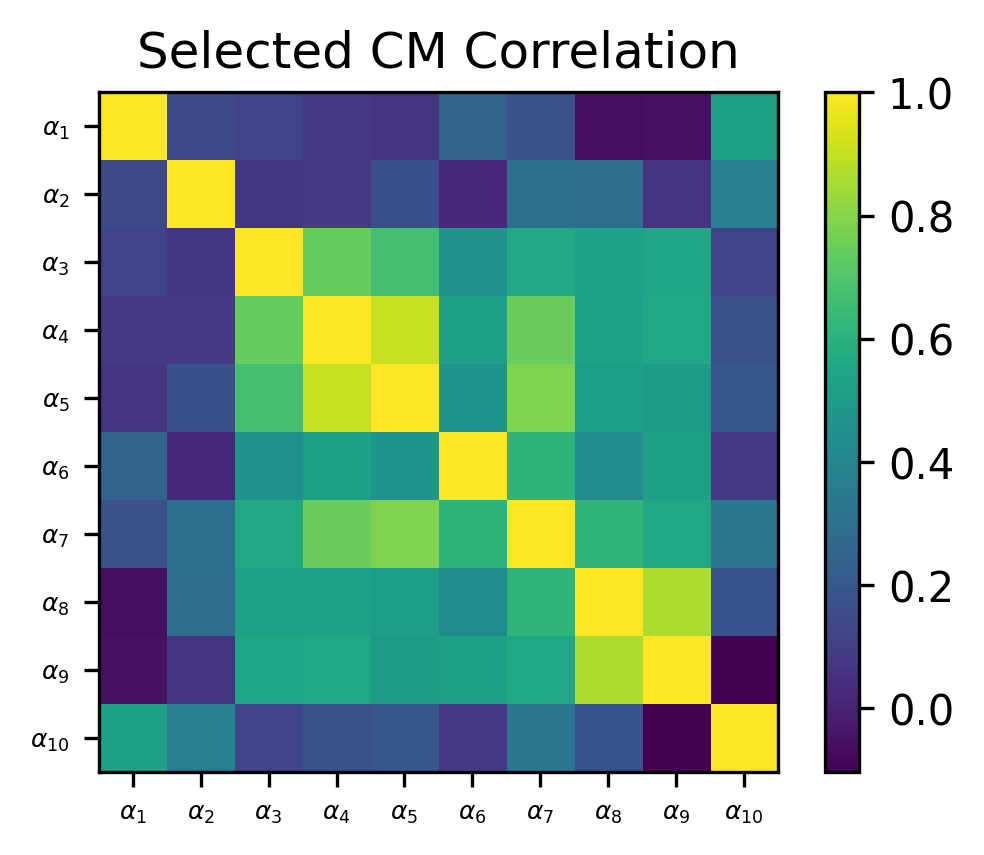

INFO:epimodel.pymc3_models.cm_effect.datapreprocessor:Data Preprocessing Complete using:

{
    "start_date": "2020-2-10",
    "end_date": "2020-04-05",
    "min_final_num_active_cases": 100,
    "min_num_active_mask": 10,
    "min_num_confirmed_mask": 10
}
Selected 35 Regions: f['AD', 'AT', 'BA', 'BE', 'BG', 'CH', 'CZ', 'DE', 'DK', 'EE', 'EG', 'ES', 'FI', 'FR', 'GB', 'GR', 'HR', 'HU', 'IE', 'IL', 'IS', 'IT', 'JP', 'KR', 'LT', 'MX', 'NL', 'PL', 'RO', 'RS', 'RU', 'SE', 'SG', 'SI', 'SK']
/Users/annie/anaconda/envs/py38/lib/python3.8/site-packages/pymc3/model.py:1430: ImputationWarning: Data in Observed_log contains missing values and will be automatically imputed from the sampling distribution.
  warnings.warn(impute_message, ImputationWarning)
INFO:__main__:Checking model test point
INFO:__main__:
CM_Alpha_log__              -14.19
RegionGrowthRate_log          9.98
RegionNoiseScale             72.69
Growth                     2711.95
InitialSize_log            -112.75
Observed_log_miss

CM_Alpha_log__              -14.19
RegionGrowthRate_log          9.98
RegionNoiseScale             72.69
Growth                     2711.95
InitialSize_log            -112.75
Observed_log_missing          0.00
Observed_log           -2319377.26
Name: Log-probability of test_point, dtype: float64


Multiprocess sampling (2 chains in 2 jobs)
INFO:pymc3:Multiprocess sampling (2 chains in 2 jobs)
NUTS: [Observed_log_missing, InitialSize_log, Growth, RegionNoiseScale, RegionGrowthRate_log, CM_Alpha]
INFO:pymc3:NUTS: [Observed_log_missing, InitialSize_log, Growth, RegionNoiseScale, RegionGrowthRate_log, CM_Alpha]
Sampling 2 chains, 0 divergences: 100%|██████████| 5000/5000 [07:18<00:00, 11.41draws/s]
The number of effective samples is smaller than 10% for some parameters.
INFO:epimodel.regions:Name index has 7 potential conflicts: ['american samoa', 'georgia', 'guam', 'northern mariana islands', 'puerto rico', 'united states minor outlying islands', 'virgin islands (u.s.)']


['Masks over 60', 'Asymptomatic contact isolation', 'Gatherings limited to 10', 'Gatherings limited to 100', 'Gatherings limited to 1000', 'Business suspended - some', 'Schools and universities closed', 'General curfew - permissive', 'General curfew - strict', 'Healthcare specialisation over 0.2']


INFO:epimodel.pymc3_models.cm_effect.datapreprocessor:
Countermeasures                               min   ... mean  ... max   ... unique
 1 Masks over 60                              0.000 ... 0.016 ... 1.000 ... [0. 1.]
 2 Asymptomatic contact isolation             0.000 ... 0.120 ... 1.000 ... [0. 1.]
 3 Gatherings limited to 10                   0.000 ... 0.153 ... 1.000 ... [0. 1.]
 4 Gatherings limited to 100                  0.000 ... 0.248 ... 1.000 ... [0. 1.]
 5 Gatherings limited to 1000                 0.000 ... 0.285 ... 1.000 ... [0. 1.]
 6 Business suspended - some                  0.000 ... 0.283 ... 1.000 ... [0. 1.]
 7 Schools and universities closed            0.000 ... 0.359 ... 1.000 ... [0. 1.]
 8 General curfew - permissive                0.000 ... 0.190 ... 1.000 ... [0. 1.]
 9 General curfew - strict                    0.000 ... 0.149 ... 1.000 ... [0. 1.]
10 Healthcare specialisation over 0.2         0.000 ... 0.057 ... 1.000 ... [0. 1.]


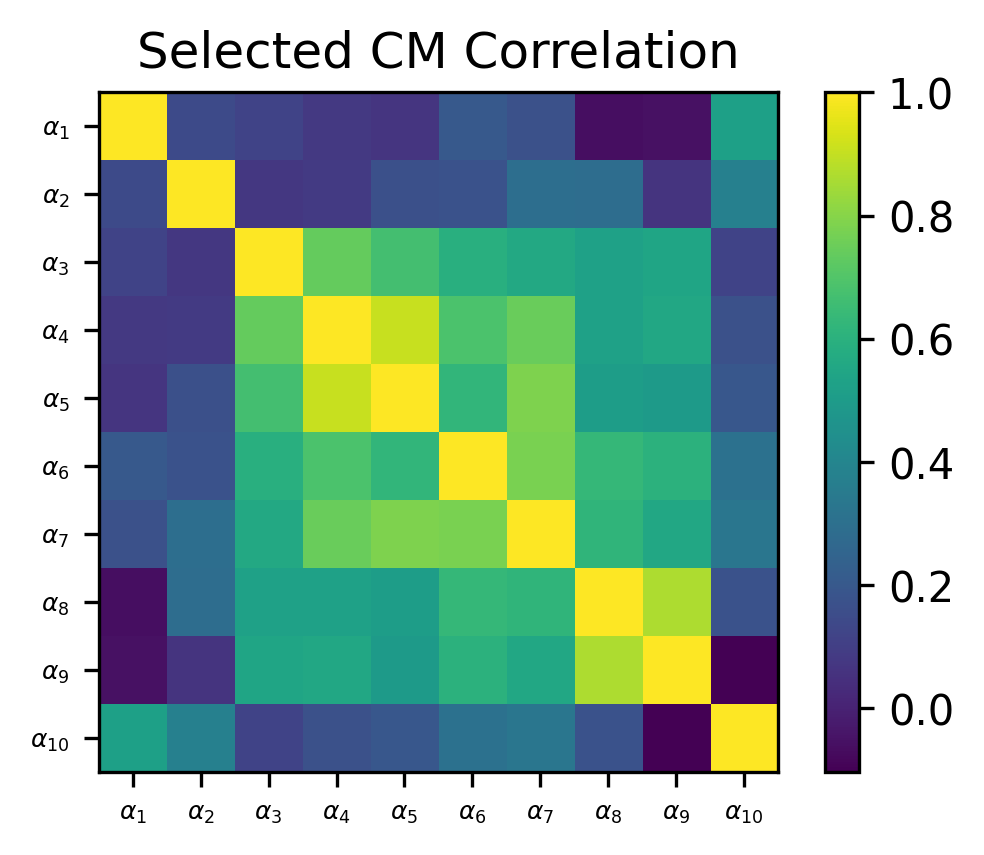

INFO:epimodel.pymc3_models.cm_effect.datapreprocessor:Data Preprocessing Complete using:

{
    "start_date": "2020-2-10",
    "end_date": "2020-04-05",
    "min_final_num_active_cases": 100,
    "min_num_active_mask": 10,
    "min_num_confirmed_mask": 10
}
Selected 35 Regions: f['AD', 'AT', 'BA', 'BE', 'BG', 'CH', 'CZ', 'DE', 'DK', 'EE', 'EG', 'ES', 'FI', 'FR', 'GB', 'GR', 'HR', 'HU', 'IE', 'IL', 'IS', 'IT', 'JP', 'KR', 'LT', 'MX', 'NL', 'PL', 'RO', 'RS', 'RU', 'SE', 'SG', 'SI', 'SK']
/Users/annie/anaconda/envs/py38/lib/python3.8/site-packages/pymc3/model.py:1430: ImputationWarning: Data in Observed_log contains missing values and will be automatically imputed from the sampling distribution.
  warnings.warn(impute_message, ImputationWarning)
INFO:__main__:Checking model test point
INFO:__main__:
CM_Alpha_log__              -14.19
RegionGrowthRate_log          9.98
RegionNoiseScale             72.69
Growth                     2711.95
InitialSize_log            -112.75
Observed_log_miss

CM_Alpha_log__              -14.19
RegionGrowthRate_log          9.98
RegionNoiseScale             72.69
Growth                     2711.95
InitialSize_log            -112.75
Observed_log_missing          0.00
Observed_log           -2582100.39
Name: Log-probability of test_point, dtype: float64


Multiprocess sampling (2 chains in 2 jobs)
INFO:pymc3:Multiprocess sampling (2 chains in 2 jobs)
NUTS: [Observed_log_missing, InitialSize_log, Growth, RegionNoiseScale, RegionGrowthRate_log, CM_Alpha]
INFO:pymc3:NUTS: [Observed_log_missing, InitialSize_log, Growth, RegionNoiseScale, RegionGrowthRate_log, CM_Alpha]
Sampling 2 chains, 2 divergences: 100%|██████████| 5000/5000 [07:19<00:00, 11.38draws/s]
There were 2 divergences after tuning. Increase `target_accept` or reparameterize.
ERROR:pymc3:There were 2 divergences after tuning. Increase `target_accept` or reparameterize.
The estimated number of effective samples is smaller than 200 for some parameters.
ERROR:pymc3:The estimated number of effective samples is smaller than 200 for some parameters.
INFO:epimodel.regions:Name index has 7 potential conflicts: ['american samoa', 'georgia', 'guam', 'northern mariana islands', 'puerto rico', 'united states minor outlying islands', 'virgin islands (u.s.)']


['Masks over 60', 'Asymptomatic contact isolation', 'Gatherings limited to 10', 'Gatherings limited to 100', 'Gatherings limited to 1000', 'Business suspended - some', 'Business suspended - many', 'General curfew - permissive', 'General curfew - strict', 'Healthcare specialisation over 0.2']


INFO:epimodel.pymc3_models.cm_effect.datapreprocessor:
Countermeasures                               min   ... mean  ... max   ... unique
 1 Masks over 60                              0.000 ... 0.016 ... 1.000 ... [0. 1.]
 2 Asymptomatic contact isolation             0.000 ... 0.120 ... 1.000 ... [0. 1.]
 3 Gatherings limited to 10                   0.000 ... 0.153 ... 1.000 ... [0. 1.]
 4 Gatherings limited to 100                  0.000 ... 0.248 ... 1.000 ... [0. 1.]
 5 Gatherings limited to 1000                 0.000 ... 0.285 ... 1.000 ... [0. 1.]
 6 Business suspended - some                  0.000 ... 0.283 ... 1.000 ... [0. 1.]
 7 Business suspended - many                  0.000 ... 0.206 ... 1.000 ... [0. 1.]
 8 General curfew - permissive                0.000 ... 0.190 ... 1.000 ... [0. 1.]
 9 General curfew - strict                    0.000 ... 0.149 ... 1.000 ... [0. 1.]
10 Healthcare specialisation over 0.2         0.000 ... 0.057 ... 1.000 ... [0. 1.]


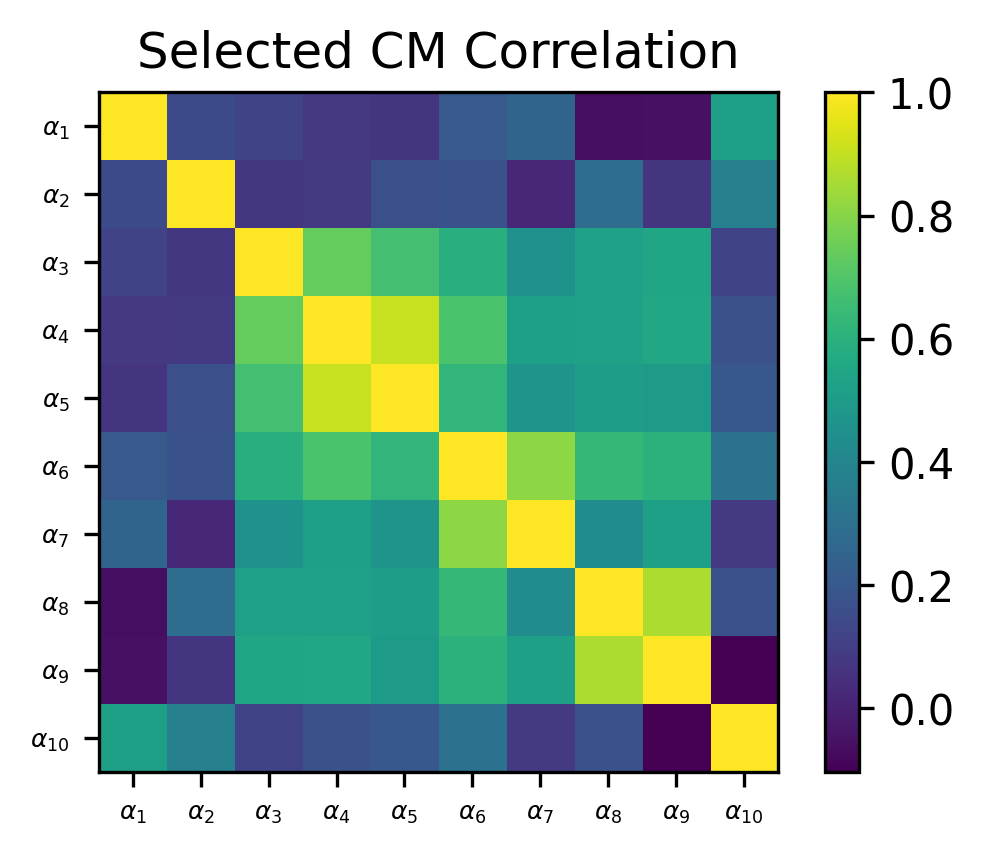

INFO:epimodel.pymc3_models.cm_effect.datapreprocessor:Data Preprocessing Complete using:

{
    "start_date": "2020-2-10",
    "end_date": "2020-04-05",
    "min_final_num_active_cases": 100,
    "min_num_active_mask": 10,
    "min_num_confirmed_mask": 10
}
Selected 35 Regions: f['AD', 'AT', 'BA', 'BE', 'BG', 'CH', 'CZ', 'DE', 'DK', 'EE', 'EG', 'ES', 'FI', 'FR', 'GB', 'GR', 'HR', 'HU', 'IE', 'IL', 'IS', 'IT', 'JP', 'KR', 'LT', 'MX', 'NL', 'PL', 'RO', 'RS', 'RU', 'SE', 'SG', 'SI', 'SK']
/Users/annie/anaconda/envs/py38/lib/python3.8/site-packages/pymc3/model.py:1430: ImputationWarning: Data in Observed_log contains missing values and will be automatically imputed from the sampling distribution.
  warnings.warn(impute_message, ImputationWarning)
INFO:__main__:Checking model test point
INFO:__main__:
CM_Alpha_log__              -14.19
RegionGrowthRate_log          9.98
RegionNoiseScale             72.69
Growth                     2711.95
InitialSize_log            -112.75
Observed_log_miss

CM_Alpha_log__              -14.19
RegionGrowthRate_log          9.98
RegionNoiseScale             72.69
Growth                     2711.95
InitialSize_log            -112.75
Observed_log_missing          0.00
Observed_log           -2053685.43
Name: Log-probability of test_point, dtype: float64


Multiprocess sampling (2 chains in 2 jobs)
INFO:pymc3:Multiprocess sampling (2 chains in 2 jobs)
NUTS: [Observed_log_missing, InitialSize_log, Growth, RegionNoiseScale, RegionGrowthRate_log, CM_Alpha]
INFO:pymc3:NUTS: [Observed_log_missing, InitialSize_log, Growth, RegionNoiseScale, RegionGrowthRate_log, CM_Alpha]
Sampling 2 chains, 0 divergences: 100%|██████████| 5000/5000 [07:48<00:00, 10.67draws/s]
The estimated number of effective samples is smaller than 200 for some parameters.
ERROR:pymc3:The estimated number of effective samples is smaller than 200 for some parameters.


['Masks over 60', 'Asymptomatic contact isolation', 'Gatherings limited to 10', 'Gatherings limited to 100', 'Gatherings limited to 1000', 'Business suspended - some', 'Business suspended - many', 'Schools and universities closed', 'General curfew - strict', 'Healthcare specialisation over 0.2']


INFO:epimodel.regions:Name index has 7 potential conflicts: ['american samoa', 'georgia', 'guam', 'northern mariana islands', 'puerto rico', 'united states minor outlying islands', 'virgin islands (u.s.)']
INFO:epimodel.pymc3_models.cm_effect.datapreprocessor:
Countermeasures                               min   ... mean  ... max   ... unique
 1 Masks over 60                              0.000 ... 0.016 ... 1.000 ... [0. 1.]
 2 Asymptomatic contact isolation             0.000 ... 0.120 ... 1.000 ... [0. 1.]
 3 Gatherings limited to 10                   0.000 ... 0.153 ... 1.000 ... [0. 1.]
 4 Gatherings limited to 100                  0.000 ... 0.248 ... 1.000 ... [0. 1.]
 5 Gatherings limited to 1000                 0.000 ... 0.285 ... 1.000 ... [0. 1.]
 6 Business suspended - some                  0.000 ... 0.283 ... 1.000 ... [0. 1.]
 7 Business suspended - many                  0.000 ... 0.206 ... 1.000 ... [0. 1.]
 8 Schools and universities closed            0.000 ... 0.359 ... 1.

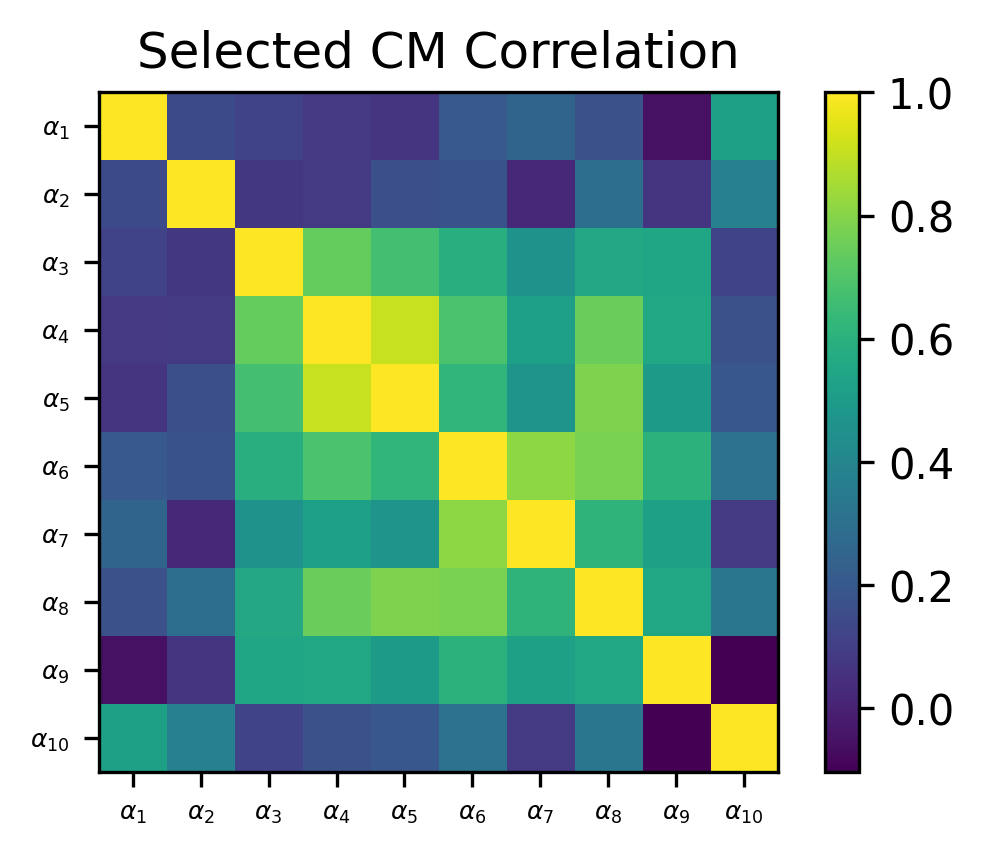

INFO:epimodel.pymc3_models.cm_effect.datapreprocessor:Data Preprocessing Complete using:

{
    "start_date": "2020-2-10",
    "end_date": "2020-04-05",
    "min_final_num_active_cases": 100,
    "min_num_active_mask": 10,
    "min_num_confirmed_mask": 10
}
Selected 35 Regions: f['AD', 'AT', 'BA', 'BE', 'BG', 'CH', 'CZ', 'DE', 'DK', 'EE', 'EG', 'ES', 'FI', 'FR', 'GB', 'GR', 'HR', 'HU', 'IE', 'IL', 'IS', 'IT', 'JP', 'KR', 'LT', 'MX', 'NL', 'PL', 'RO', 'RS', 'RU', 'SE', 'SG', 'SI', 'SK']
/Users/annie/anaconda/envs/py38/lib/python3.8/site-packages/pymc3/model.py:1430: ImputationWarning: Data in Observed_log contains missing values and will be automatically imputed from the sampling distribution.
  warnings.warn(impute_message, ImputationWarning)
INFO:__main__:Checking model test point
INFO:__main__:
CM_Alpha_log__              -14.19
RegionGrowthRate_log          9.98
RegionNoiseScale             72.69
Growth                     2711.95
InitialSize_log            -112.75
Observed_log_miss

CM_Alpha_log__              -14.19
RegionGrowthRate_log          9.98
RegionNoiseScale             72.69
Growth                     2711.95
InitialSize_log            -112.75
Observed_log_missing          0.00
Observed_log           -2275223.08
Name: Log-probability of test_point, dtype: float64


Multiprocess sampling (2 chains in 2 jobs)
INFO:pymc3:Multiprocess sampling (2 chains in 2 jobs)
NUTS: [Observed_log_missing, InitialSize_log, Growth, RegionNoiseScale, RegionGrowthRate_log, CM_Alpha]
INFO:pymc3:NUTS: [Observed_log_missing, InitialSize_log, Growth, RegionNoiseScale, RegionGrowthRate_log, CM_Alpha]
Sampling 2 chains, 0 divergences: 100%|██████████| 5000/5000 [07:30<00:00, 11.10draws/s]
The estimated number of effective samples is smaller than 200 for some parameters.
ERROR:pymc3:The estimated number of effective samples is smaller than 200 for some parameters.
INFO:epimodel.regions:Name index has 7 potential conflicts: ['american samoa', 'georgia', 'guam', 'northern mariana islands', 'puerto rico', 'united states minor outlying islands', 'virgin islands (u.s.)']


['Masks over 60', 'Asymptomatic contact isolation', 'Gatherings limited to 10', 'Gatherings limited to 100', 'Gatherings limited to 1000', 'Business suspended - some', 'Business suspended - many', 'Schools and universities closed', 'General curfew - permissive', 'Healthcare specialisation over 0.2']


INFO:epimodel.pymc3_models.cm_effect.datapreprocessor:
Countermeasures                               min   ... mean  ... max   ... unique
 1 Masks over 60                              0.000 ... 0.016 ... 1.000 ... [0. 1.]
 2 Asymptomatic contact isolation             0.000 ... 0.120 ... 1.000 ... [0. 1.]
 3 Gatherings limited to 10                   0.000 ... 0.153 ... 1.000 ... [0. 1.]
 4 Gatherings limited to 100                  0.000 ... 0.248 ... 1.000 ... [0. 1.]
 5 Gatherings limited to 1000                 0.000 ... 0.285 ... 1.000 ... [0. 1.]
 6 Business suspended - some                  0.000 ... 0.283 ... 1.000 ... [0. 1.]
 7 Business suspended - many                  0.000 ... 0.206 ... 1.000 ... [0. 1.]
 8 Schools and universities closed            0.000 ... 0.359 ... 1.000 ... [0. 1.]
 9 General curfew - permissive                0.000 ... 0.190 ... 1.000 ... [0. 1.]
10 Healthcare specialisation over 0.2         0.000 ... 0.057 ... 1.000 ... [0. 1.]


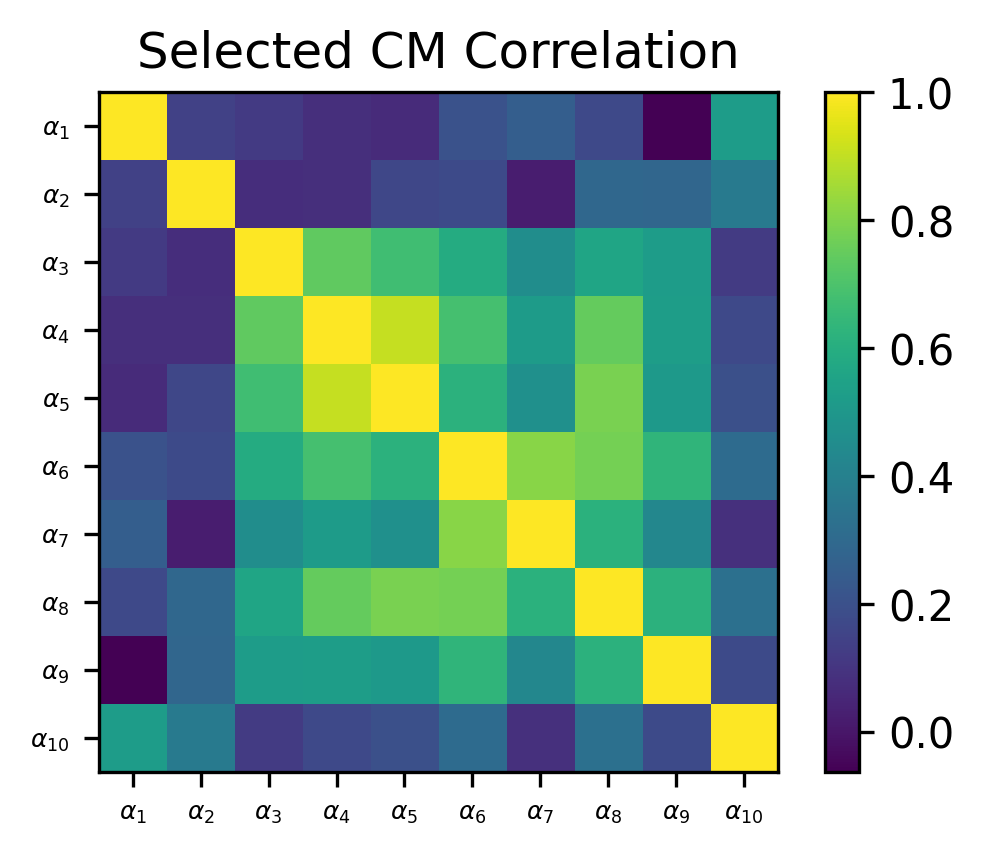

INFO:epimodel.pymc3_models.cm_effect.datapreprocessor:Data Preprocessing Complete using:

{
    "start_date": "2020-2-10",
    "end_date": "2020-04-05",
    "min_final_num_active_cases": 100,
    "min_num_active_mask": 10,
    "min_num_confirmed_mask": 10
}
Selected 35 Regions: f['AD', 'AT', 'BA', 'BE', 'BG', 'CH', 'CZ', 'DE', 'DK', 'EE', 'EG', 'ES', 'FI', 'FR', 'GB', 'GR', 'HR', 'HU', 'IE', 'IL', 'IS', 'IT', 'JP', 'KR', 'LT', 'MX', 'NL', 'PL', 'RO', 'RS', 'RU', 'SE', 'SG', 'SI', 'SK']
/Users/annie/anaconda/envs/py38/lib/python3.8/site-packages/pymc3/model.py:1430: ImputationWarning: Data in Observed_log contains missing values and will be automatically imputed from the sampling distribution.
  warnings.warn(impute_message, ImputationWarning)
INFO:__main__:Checking model test point
INFO:__main__:
CM_Alpha_log__              -14.19
RegionGrowthRate_log          9.98
RegionNoiseScale             72.69
Growth                     2711.95
InitialSize_log            -112.75
Observed_log_miss

CM_Alpha_log__              -14.19
RegionGrowthRate_log          9.98
RegionNoiseScale             72.69
Growth                     2711.95
InitialSize_log            -112.75
Observed_log_missing          0.00
Observed_log           -2779759.43
Name: Log-probability of test_point, dtype: float64


Multiprocess sampling (2 chains in 2 jobs)
INFO:pymc3:Multiprocess sampling (2 chains in 2 jobs)
NUTS: [Observed_log_missing, InitialSize_log, Growth, RegionNoiseScale, RegionGrowthRate_log, CM_Alpha]
INFO:pymc3:NUTS: [Observed_log_missing, InitialSize_log, Growth, RegionNoiseScale, RegionGrowthRate_log, CM_Alpha]
Sampling 2 chains, 0 divergences: 100%|██████████| 5000/5000 [07:07<00:00, 11.70draws/s]
The estimated number of effective samples is smaller than 200 for some parameters.
ERROR:pymc3:The estimated number of effective samples is smaller than 200 for some parameters.
INFO:epimodel.regions:Name index has 7 potential conflicts: ['american samoa', 'georgia', 'guam', 'northern mariana islands', 'puerto rico', 'united states minor outlying islands', 'virgin islands (u.s.)']


['Masks over 60', 'Asymptomatic contact isolation', 'Gatherings limited to 10', 'Gatherings limited to 100', 'Gatherings limited to 1000', 'Business suspended - some', 'Business suspended - many', 'Schools and universities closed', 'General curfew - permissive', 'General curfew - strict']


INFO:epimodel.pymc3_models.cm_effect.datapreprocessor:
Countermeasures                               min   ... mean  ... max   ... unique
 1 Masks over 60                              0.000 ... 0.016 ... 1.000 ... [0. 1.]
 2 Asymptomatic contact isolation             0.000 ... 0.120 ... 1.000 ... [0. 1.]
 3 Gatherings limited to 10                   0.000 ... 0.153 ... 1.000 ... [0. 1.]
 4 Gatherings limited to 100                  0.000 ... 0.248 ... 1.000 ... [0. 1.]
 5 Gatherings limited to 1000                 0.000 ... 0.285 ... 1.000 ... [0. 1.]
 6 Business suspended - some                  0.000 ... 0.283 ... 1.000 ... [0. 1.]
 7 Business suspended - many                  0.000 ... 0.206 ... 1.000 ... [0. 1.]
 8 Schools and universities closed            0.000 ... 0.359 ... 1.000 ... [0. 1.]
 9 General curfew - permissive                0.000 ... 0.190 ... 1.000 ... [0. 1.]
10 General curfew - strict                    0.000 ... 0.149 ... 1.000 ... [0. 1.]


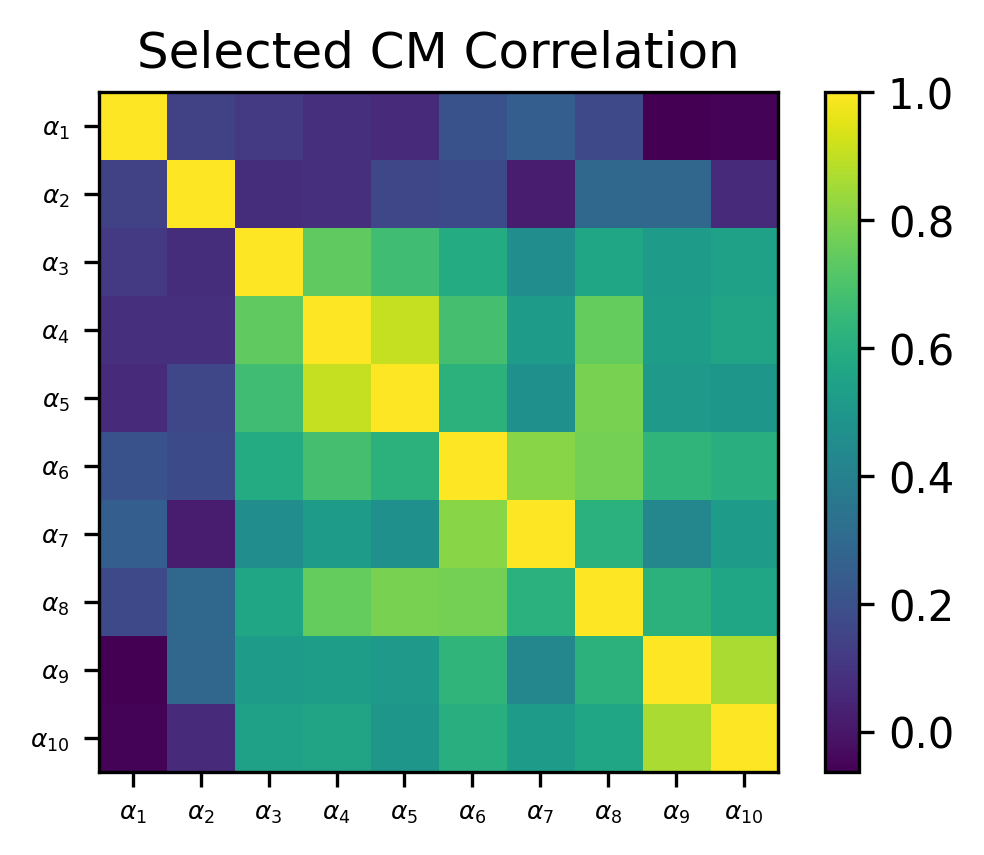

INFO:epimodel.pymc3_models.cm_effect.datapreprocessor:Data Preprocessing Complete using:

{
    "start_date": "2020-2-10",
    "end_date": "2020-04-05",
    "min_final_num_active_cases": 100,
    "min_num_active_mask": 10,
    "min_num_confirmed_mask": 10
}
Selected 35 Regions: f['AD', 'AT', 'BA', 'BE', 'BG', 'CH', 'CZ', 'DE', 'DK', 'EE', 'EG', 'ES', 'FI', 'FR', 'GB', 'GR', 'HR', 'HU', 'IE', 'IL', 'IS', 'IT', 'JP', 'KR', 'LT', 'MX', 'NL', 'PL', 'RO', 'RS', 'RU', 'SE', 'SG', 'SI', 'SK']
/Users/annie/anaconda/envs/py38/lib/python3.8/site-packages/pymc3/model.py:1430: ImputationWarning: Data in Observed_log contains missing values and will be automatically imputed from the sampling distribution.
  warnings.warn(impute_message, ImputationWarning)
INFO:__main__:Checking model test point
INFO:__main__:
CM_Alpha_log__              -14.19
RegionGrowthRate_log          9.98
RegionNoiseScale             72.69
Growth                     2711.95
InitialSize_log            -112.75
Observed_log_miss

CM_Alpha_log__              -14.19
RegionGrowthRate_log          9.98
RegionNoiseScale             72.69
Growth                     2711.95
InitialSize_log            -112.75
Observed_log_missing          0.00
Observed_log           -2627030.09
Name: Log-probability of test_point, dtype: float64


Multiprocess sampling (2 chains in 2 jobs)
INFO:pymc3:Multiprocess sampling (2 chains in 2 jobs)
NUTS: [Observed_log_missing, InitialSize_log, Growth, RegionNoiseScale, RegionGrowthRate_log, CM_Alpha]
INFO:pymc3:NUTS: [Observed_log_missing, InitialSize_log, Growth, RegionNoiseScale, RegionGrowthRate_log, CM_Alpha]
Sampling 2 chains, 0 divergences: 100%|██████████| 5000/5000 [07:58<00:00, 10.44draws/s]
The estimated number of effective samples is smaller than 200 for some parameters.
ERROR:pymc3:The estimated number of effective samples is smaller than 200 for some parameters.


In [138]:
cm_leavouts = ['None',
               'Masks over 60',
               'Asymptomatic contact isolation',
               'Gatherings limited to 10',
               'Gatherings limited to 100',
               'Gatherings limited to 1000',
               'Business suspended - some',
               'Business suspended - many',
               'Schools and universities closed',
               'General curfew - permissive',
               'General curfew - strict',
               'Healthcare specialisation over 0.2']

models = []
for cm_leavout in cm_leavouts:
    features = ['Masks over 60',
     'Asymptomatic contact isolation',
     'Gatherings limited to 10',
     'Gatherings limited to 100',
     'Gatherings limited to 1000',
     'Business suspended - some',
     'Business suspended - many',
     'Schools and universities closed',
     'General curfew - permissive',
     'General curfew - strict',
     'Healthcare specialisation over 0.2']
    if isinstance(cm_leavout, list):
        for cm_feature in cm_leavout:
            features.remove(cm_feature)
    elif cm_leavout=='None':
        pass
    else:
        features.remove(cm_leavout)
    print(features)
    dp = DataPreprocessor()
    data = dp.preprocess_data("../../data", regions, features)

    with cm_effect.models.CMModelFlexibleV3p1(data) as model:
        model.build_cm_reduction_exp_gamma_prior()
        model.build_region_growth_prior()
        model.build_region_reliability_prior()
        model.build_rates()
        model.build_output_model()
        log.info("Checking model test point")
        log.info(f"\n{model.check_test_point()}\n")
    
    model.run(2000)
    #model.plot_traces()
    models.append(model)

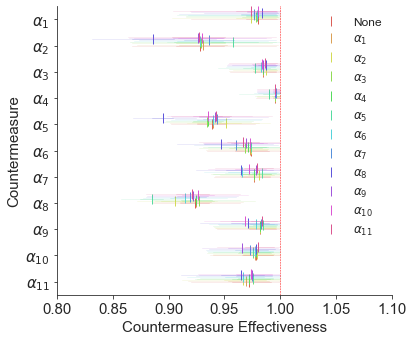

In [519]:
fig = plt.figure(figsize=(6, 5))
colors = sns.color_palette("hls",12)

all_features = np.array(['Masks over 60',
     'Asymptomatic contact isolation',
     'Gatherings limited to 10',
     'Gatherings limited to 100',
     'Gatherings limited to 1000',
     'Business suspended - some',
     'Business suspended - many',
     'Schools and universities closed',
     'General curfew - permissive',
     'General curfew - strict',
     'Healthcare specialisation over 0.2'])

for i in range(len(models)):
        means = np.mean(models[i].trace["CMReduction"], axis=0)
        li = np.percentile(models[i].trace["CMReduction"], 2.5, axis=0)
        ui = np.percentile(models[i].trace["CMReduction"], 97.5, axis=0)
        lq = np.percentile(models[i].trace["CMReduction"], 25, axis=0)
        uq = np.percentile(models[i].trace["CMReduction"], 75, axis=0)

        N_cms = len(all_features) #means.size
        
        ind_labels = []
        if isinstance(cm_leavouts[i], list):
            for cm_feature in cm_leavouts[i]:
                ind = np.where(all_features==cm_feature)[0][0]
                means = np.insert(means, ind, np.nan)
                li = np.insert(li, ind, np.nan)
                ui = np.insert(ui, ind, np.nan)
                lq = np.insert(lq, ind, np.nan)
                uq = np.insert(uq, ind, np.nan)
                ind_labels.append(ind+1)
        elif cm_leavouts[i]=='None':
            pass
        else:
            ind = np.where(all_features==cm_leavouts[i])[0][0]
            means = np.insert(means, ind, np.nan)
            li = np.insert(li, ind, np.nan)
            ui = np.insert(ui, ind, np.nan)
            lq = np.insert(lq, ind, np.nan)
            uq = np.insert(uq, ind, np.nan)
            ind_labels.append(ind+1)
    
        y_vals = -1 * np.arange(N_cms)
        
        if cm_leavouts[i] == 'None':
            label = 'None'
        else:
            label = f"$\\alpha_{{{', '.join(map(str, ind_labels))}}}$"
        plt.plot(means, y_vals+i*0.03, marker="|", markersize=10, color=colors[i], 
                 label = label,
                 linewidth=0)
        for cm in range(N_cms):
            plt.plot([li[cm], ui[cm]], [y_vals[cm]+i*0.03, y_vals[cm]+i*0.03], color=colors[i], alpha=0.15, linewidth=0.8)#0.25
            plt.plot([lq[cm], uq[cm]], [y_vals[cm]+i*0.03, y_vals[cm]+i*0.03], color=colors[i], alpha=0.25, linewidth=0.8)#0.5

plt.plot([1, 1], [1, -(N_cms)], "--r", linewidth=0.5)
plt.xlim([0.8, 1.1])
plt.rc('font', size=15)
plt.ylim([-(N_cms - 0.5), 0.5])
plt.ylabel("Countermeasure", rotation=90)
plt.yticks(y_vals, [f"$\\alpha_{{{i + 1}}}$" for i in range(N_cms)])
plt.xlabel("Countermeasure Effectiveness")
plt.tight_layout()
plt.legend(frameon=False, fontsize=12, loc = 'upper right')
sns.despine()
plt.savefig('out/cm_leavout_sensitivity.pdf')